<a href="https://colab.research.google.com/github/zia207/r-colab/blob/main/NoteBook/Machine_Learning/Tree_based/03-01-03-04-tree-based-models-gradient-boosted-catboost-r.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

![alt text](http://drive.google.com/uc?export=view&id=1bLQ3nhDbZrCCqy_WCxxckOne2lgVvn3l)

# 3.4 Categorical Boosting (CatBoost)

CatBoost (Categorical Boosting) is an open-source machine learning algorithm developed by Yandex, designed for gradient boosting on decision trees. It excels in handling categorical features efficiently and is particularly effective for tabular data tasks, such as classification, regression, and ranking. CatBoost is known for its high performance, ease of use, and ability to work well with default parameters, reducing the need for extensive hyperparameter tuning. This tutorial provides a detailed overview of CatBoost, including its mathematical foundations, key features, and practical implementation steps.


## Overview

CatBoost is a gradient boosting library that is particularly effective for categorical features. It handles categorical variables automatically, which can save time and improve model performance. It is designed to work with large datasets and can be used for both classification and regression tasks. It is known for its speed and accuracy, making it a popular choice for machine learning practitioners. It is available in Python, R, and other programming languages. It is particularly useful for datasets with a large number of categorical features, as it can handle them without the need for extensive preprocessing. It is also designed to be robust against overfitting, making it a reliable choice for many machine learning tasks. CatBoost uses a technique called "ordered boosting" to improve the accuracy of the model and reduce overfitting. It also includes features such as support for missing values, automatic hyperparameter tuning, and the ability to handle large datasets efficiently. It is widely used in industry and has been shown to achieve state-of-the-art results on many benchmark datasets. CatBoost is particularly effective for tasks such as click-through rate prediction, fraud detection, and recommendation systems. It is also known for its ease of use, with a simple API that allows users to quickly build and deploy models. Overall, CatBoost is a powerful tool for machine learning practitioners looking to build accurate and efficient models with categorical data.\`

CatBoost (Categorical Boosting) is an open-source machine learning algorithm developed by Yandex, designed for gradient boosting on decision trees. It excels in handling categorical features efficiently and is particularly effective for tabular data tasks, such as classification, regression, and ranking. CatBoost is known for its high performance, ease of use, and ability to work well with default parameters, reducing the need for extensive hyperparameter tuning.


### Key Features of CatBoost

Key features of CatBoost include:

-   Native handling of categorical features: Automatically processes categorical variables without requiring extensive preprocessing (e.g., one-hot encoding).

-   Robust to overfitting: Incorporates techniques like ordered boosting to prevent overfitting.

-   Support for GPU acceleration: Enables faster training on large datasets.

-   High performance: Often outperforms other gradient boosting libraries like XGBoost and LightGBM in terms of speed and accuracy on datasets with categorical features.

### How CatBoost Works

CatBoost builds on the principles of gradient boosting, where an ensemble of weak learners (typically decision trees) is combined to create a strong predictive model. It iteratively builds trees to minimize a loss function, with each tree correcting the errors of the previous ones. Below is an explanation of how CatBoost works, focusing on its unique aspects:

1.  Initialize the Model

CatBoost starts by initializing a model with a constant prediction for all data points, typically the mean of the target variable (for regression) or the log-odds (for classification).

For `regression`:

$$ F_0(x) = \arg\min_{\gamma} \sum_{i=1}^n L(y_i, \gamma) $$

Where:

-   $F_0(x)$: Initial model prediction (constant for all inputs \$x \$).

-   $y_i$: True target value for the $i$-th data point.

-   $L(y_i, \gamma)$): Loss function (e.g., mean squared error, $L(y_i, \gamma) = (y_i - \gamma)^2$.

Thsi is often simplifies to:

$$ F_0(x) = \frac{1}{n} \sum_{i=1}^n y_i $$

For `classification` (e.g., binary classification with log loss):

$$ F_0(x) = \log\left(\frac{\sum_{i:y_i=1} 1}{\sum_{i:y_i=0} 1}\right) $$

This represents the initial log-odds based on the class distribution.

2.  Handle Categorical Features (Ordered Target Encoding)

CatBoost processes categorical features by converting them into numerical values using **ordered target encoding**, which computes statistics based on the target variable while avoiding data leakage.

-   For a categorical feature $x_k$ with categories $\{c_1, c_2, \dots, c_m\}$, CatBoost calculates a target statistic (e.g., mean target value) for each category.

-   To prevent leakage, it uses only prior data points in a random permutation of the dataset.

For a categorical feature value $c$ at data point $i$:

$$ x_{i,k}^{\text{encoded}} = \frac{\sum_{j \in P_i, x_{j,k}=c} y_j + \alpha \cdot \bar{y}}{\sum_{j \in P_i, x_{j,k}=c} 1 + \alpha} $$

Where:

-   $x_{i,k}^{\text{encoded}}$: Encoded value of the categorical feature $x_k$ for the $i$-th data point.

-   $P_i$: Set of data points before $i$ in the random permutation.

-   $y_j$: Target value for the $j$-th data point.

-   $\bar{y}$: Global mean of the target (prior).

-   $\alpha$: Smoothing parameter to balance the category-specific mean and the global mean (prevents overfitting for rare categories).

This encoding ensures that the model uses only past data to compute statistics, mimicking the inference-time scenario and reducing bias.

3.  Compute Residuals (Gradients)

CatBoost uses gradient boosting, where each iteration builds a new tree to fit the residuals (or gradients) of the loss function from the previous iteration. At each iteration \$m, CatBoost computes the gradient of the loss function with respect to the current model's predictions to determine the direction for the next tree.

Gradient for the $i$-th data point):

$$ g_i^{(m)} = -\frac{\partial L(y_i, F_{m-1}(x_i))}{\partial F_{m-1}(x_i)} $$

Where:

-   $g_i^{(m)}$: Gradient for the $i$-th data point at iteration $m$.

-   $F_{m-1}(x_i)$: Current model prediction for the $i$-th data point after $m-1$ iterations.

-   $L(y_i, F_{m-1}(x_i))$: Loss function (e.g., for regression, $L = (y_i - F_{m-1}(x_i))^2$; for binary classification, $L = -[y_i \log(\sigma(F_{m-1}(x_i))) + (1-y_i) \log(1-\sigma(F_{m-1}(x_i)))]$, where $sigma$ is the sigmoid function).

For mean squared error in regression:

$$ g_i^{(m)} = y_i - F_{m-1}(x_i) $$

For log loss in binary classification:

$$ g_i^{(m)} = \sigma(F_{m-1}(x_i)) - y_i $$

Where $\sigma(z) = \frac{1}{1 + e^{-z}}$

4.  Ordered Boosting

To reduce overfitting, CatBoost uses **ordered boosting**, where gradients for each data point are computed using a model trained on prior data points in a random permutation. This avoids using the same data for gradient computation and tree building.

-   The dataset is split into a random permutation, and for each data point $i$, a separate model is trained on data points before $i$ in the permutation.

-   The gradient $g_i^{(m)}$ is computed using this separate model.

Gradient for ordered boosting:

Where:

-   $F_{m-1}^{(-i)}(x_i)$: Prediction for the $i$-th data point using a model trained on data points before $i$ in the permutation.

This ensures that the gradient is unbiased, as it does not use the current data point's information, reducing overfitting.

5. Build a Decision Tree

CatBoost constructs a decision tree to fit the gradients $g_i^{(m)}$. It uses **symmetric trees** (balanced trees with the same split condition at each level) for efficiency and consistency.

Tree output for a leaf:

$$ h_m(x) = \arg\min_{\gamma} \sum_{i \in R_j} L(y_i, F_{m-1}(x_i) + \gamma) $$

Where:

-   $h_m(x)$: Output of the $m$-th tree (a piecewise constant function based on the leaf $R_j$ that $x$ falls into).

-   $R_j$: $j$-th leaf region of the tree.

-   $\gamma$: Optimal leaf value, computed to minimize the loss.

For mean squared error:

$$ h_m(x_i) = \frac{\sum_{i \in R_j} g_i^{(m)}}{\sum_{i \in R_j} 1} $$

This is the average gradient in the leaf region.

CatBoost uses histogram-based splitting for numerical features and the encoded values from Step 2 for categorical features to determine the best splits.

6.  Update the Model

The new tree is added to the ensemble, scaled by a learning rate to control the contribution of each tree.

$$ F_m(x) = F_{m-1}(x) + \eta \cdot h_m(x) $$

Where:

-   $F_m(x)$: Updated model prediction after $m$ iterations.

-   $\eta$: Learning rate (typically small, e.g., 0.01–0.3).

-   $h_m(x)$: Output of the $m$-th tree.

7.  Repeat Until Convergence

Steps 3–6 are repeated for a specified number of iterations ($M$ ) or until early stopping is triggered (based on validation performance). The final model is:

$$ F(x) = F_0(x) + \eta \sum_{m=1}^M h_m(x) $$

7.  Prediction

For a new data point $x$, CatBoost applies the same categorical encoding (using statistics computed during training) and passes the input through the ensemble of trees.

$$ \hat{y} = F(x) = F_0(x) + \eta \sum_{m=1}^M h_m(x) $$

For classification, the output is passed through a sigmoid function (binary) or softmax (multiclass) to obtain probabilities:

$$ p(x) = \sigma(F(x)) \quad \text{or} \quad p_k(x) = \frac{e^{F_k(x)}}{\sum_{j} e^{F_j(x)}} $$

The flowchart below summarizes the CatBoost algorithm, highlighting its key steps from initialization to prediction:


![alt text](http://drive.google.com/uc?export=view&id=1N0gmbjTlKUf5O26bpDwR7VGDndEMMVbi
)








### Advantages of CatBoost

- `Native Categorical Handling`: Processes categorical features without manual encoding.
- `Robust to Overfitting`: Uses ordered boosting and symmetric trees.
- `High Performance`: Often outperforms XGBoost/LightGBM on categorical data.
- `Minimal Tuning`: Good default settings reduce hyperparameter effort.
- `Feature Interpretability`: Supports feature importance and SHAP values.
- `Handles Missing Values`: No imputation needed.
- `Scalable`: Efficient for large datasets with GPU support.



### Limitations of CatBoost

- `Computationally Intensive`: Slower on large datasets without GPU.
- `High Memory Usage`: Can be memory-heavy for many categories.
- `Smaller Community`: Fewer resources than XGBoost/LightGBM.
- `Complex Customization`: Fine-tuning can be challenging.
- `Noise Sensitivity`: Requires preprocessing for noisy data.


## Setup R in Python Runtype

### Install {rpy2}

{rpy2} is a Python package that provides an interface to the R programming language, allowing Python users to run R code, call R functions, and manipulate R objects directly from Python. It enables seamless integration between Python and R, leveraging R's statistical and graphical capabilities while using Python's flexibility. The package supports passing data between the two languages and is widely used for statistical analysis, data visualization, and machine learning tasks that benefit from R's specialized libraries.

In [ ]:
!pip uninstall rpy2 -y
!pip install rpy2==3.5.1
%load_ext rpy2.ipython

Found existing installation: rpy2 3.5.1
Uninstalling rpy2-3.5.1:
  Successfully uninstalled rpy2-3.5.1
  Using cached rpy2-3.5.1-cp311-cp311-linux_x86_64.whl


### Mount Google Drive

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).



## CatBoost Implementation in R from Scratch

To fit a CatBoost-like model from scratch in R without external packages, we'll implement a simplified gradient boosting algorithm using decision stumps (depth-1 trees) with Newton-Raphson updates. The synthetic Titanic dataset includes key features like passenger class, sex, age, siblings/spouses, parents/children, fare, and embarkation port. The target is survival status (binary).

**Decision stumps** are the simplest form of decision trees—they make a single binary split (depth = 1) based on one feature. They act as "weak learners" in boosting algorithms.

**Newton-Raphson** is an optimization method that uses second-order derivatives (Hessian) for faster convergence. In gradient boosting, it calculates optimal leaf values by minimizing the loss function more efficiently than first-order gradients alone.


### Generate Synthetic Titanic like Dataset






In [ ]:
%%R
set.seed(123)
n <- 1000  # Number of samples

# Generate features
Pclass <- sample(1:3, n, replace = TRUE, prob = c(0.2, 0.3, 0.5))
Sex <- sample(c("male", "female"), n, replace = TRUE, prob = c(0.6, 0.4))
Age <- round(rnorm(n, mean = 30, sd = 10), 1)
Age[Age < 1] <- 1  # Ensure age is positive
SibSp <- sample(0:5, n, replace = TRUE, prob = c(0.7, 0.1, 0.1, 0.05, 0.03, 0.02))
Parch <- sample(0:4, n, replace = TRUE, prob = c(0.8, 0.1, 0.05, 0.03, 0.02))
Fare <- round(rgamma(n, shape = 2, scale = 15), 2)
Embarked <- sample(c("C", "Q", "S"), n, replace = TRUE, prob = c(0.3, 0.2, 0.5))

# Generate survival probabilities based on features
surv_prob <- plogis(
  0.5 * (Sex == "female") +
  0.3 * (Pclass == 1) - 0.4 * (Pclass == 3) +
  0.02 * (Age - 30) -
  0.05 * SibSp - 0.02 * Parch +
  0.001 * Fare +
  0.2 * (Embarked == "C") - 0.1 * (Embarked == "Q")
)
Survived <- rbinom(n, 1, surv_prob)

# Combine into data frame
titanic <- data.frame(
  Pclass, Sex, Age, SibSp, Parch, Fare, Embarked, Survived
)
head(titanic)

  Pclass    Sex  Age SibSp Parch  Fare Embarked Survived
1      3   male 20.0     0     0 19.82        Q        1
2      2   male 19.6     1     4 23.85        C        0
3      3   male 29.8     0     0 34.27        S        0
4      1 female 28.7     1     0 44.96        S        1
5      1 female  4.5     0     0  5.36        Q        0
6      3   male 40.4     0     0 42.41        S        0


### Preprocess Data

Convert categorical features to numeric:


In [ ]:
%%R
preprocess_data <- function(df) {
  df$Sex <- as.numeric(factor(df$Sex)) - 1  # male=0, female=1
  df$Embarked <- as.numeric(factor(df$Embarked)) - 1  # C=0, Q=1, S=2
  return(as.matrix(df))
}

X <- preprocess_data(titanic[, names(titanic) != "Survived"])
y <- titanic$Survived


### Implement Gradient Boosting with Stumps

-   Uses `logistic loss` for binary classification.

-   Builds `decision stumps` (depth-1 trees) at each iteration.

-   Applies `Newton-Raphson updates` for leaf values.

In [ ]:
%%R
# Sigmoid function for probabilities
sigmoid <- function(z) 1 / (1 + exp(-z))

# Train the model
gradient_boosting <- function(
  X, y, n_trees = 50, learning_rate = 0.1, depth = 1
) {
  n <- nrow(X)
  p <- ncol(X)
  F0 <- log(mean(y) / (1 - mean(y)))  # Initial log-odds
  Fx <- rep(F0, n)  # Initialize predictions
  trees <- list()  # Store tree structures

  for (tree_idx in 1:n_trees) {
    # Compute current probabilities and gradients
    p_curr <- sigmoid(Fx)
    residual <- y - p_curr
    weights <- p_curr * (1 - p_curr)

    # Find best split across all features
    best_gain <- -Inf
    best_feature <- NULL
    best_split <- NULL
    best_left <- best_right <- NULL

    for (j in 1:p) {
      values <- unique(X[, j])
      if (length(values) > 10) {
        q <- quantile(X[, j], probs = seq(0.1, 0.9, 0.1))
      } else {
        q <- values
      }

      for (split_val in q) {
        left_idx <- X[, j] <= split_val
        right_idx <- !left_idx

        # Skip if split creates very small leaves
        if (sum(left_idx) < 5 || sum(right_idx) < 5) next

        # Compute gradient sums and weights for leaves
        G_left <- sum(residual[left_idx])
        G_right <- sum(residual[!left_idx])
        H_left <- sum(weights[left_idx])
        H_right <- sum(weights[!left_idx])

        # Calculate gain (simplified)
        gain <- (G_left^2 / (H_left + 1e-6) + G_right^2 / (H_right + 1e-6))
        if (gain > best_gain) {
          best_gain <- gain
          best_feature <- j
          best_split <- split_val
          best_left <- left_idx
          best_right <- right_idx
        }
      }
    }

    # Compute leaf values using Newton-Raphson
    leaf_left <- sum(residual[best_left]) / sum(weights[best_left] + 1e-6)
    leaf_right <- sum(residual[best_right]) / sum(weights[best_right] + 1e-6)

    # Update predictions
    Fx[best_left] <- Fx[best_left] + learning_rate * leaf_left
    Fx[best_right] <- Fx[best_right] + learning_rate * leaf_right

    # Save tree information
    trees[[tree_idx]] <- list(
      feature = best_feature,
      split = best_split,
      left_value = learning_rate * leaf_left,
      right_value = learning_rate * leaf_right
    )
  }

  return(list(trees = trees, init = F0))
}

### Train the Model




In [ ]:
%%R
model <- gradient_boosting(X, y, n_trees = 50, learning_rate = 0.1)

### Make Predictions

In [ ]:
%%R
predict_boost <- function(model, X) {
  Fx <- rep(model$init, nrow(X))
  for (tree in model$trees) {
    left_idx <- X[, tree$feature] <= tree$split
    Fx[left_idx] <- Fx[left_idx] + tree$left_value
    Fx[!left_idx] <- Fx[!left_idx] + tree$right_value
  }
  return(sigmoid(Fx))
}

# Predict on training data
preds <- predict_boost(model, X)
pred_class <- ifelse(preds > 0.5, 1, 0)

### Evaluate Model

In [ ]:
%%R
accuracy <- mean(pred_class == y)
cat("Training Accuracy:", round(accuracy, 3), "\n")


Training Accuracy: 0.607 


## CatBoost with R Packages

The **`catboost`** package is an R interface to **CatBoost**, a high-performance, open-source gradient boosting library developed by Yandex. It is designed to handle **categorical features natively**, without requiring manual preprocessing like one-hot encoding. CatBoost excels in classification, regression, and ranking tasks, and is optimized for both speed and accuracy. Its key strengths include **efficient handling of categorical data**, **robust default parameters**, and **built-in support for missing values**.


### Check and Install Required R Packages

Install the `{catboost}` package from GitHub if not already installed. The package is available for both Linux and Windows systems. You have to install it from source as it is not available on CRAN.

Following R packages are required to run this notebook. If any of these packages are not installed, you can install them using the code below:

In [ ]:
%%R
# Install CatBoost from GitHub source
devtools::install_github('catboost/catboost', subdir = 'catboost/R-package', force = TRUE,lib='drive/My Drive/R/')

── R CMD build ─────────────────────────────────────────────────────────────────
* checking for file ‘/tmp/RtmpXMn0Zp/remotes2b2413642e74/catboost-catboost-5b5c9f3/catboost/R-package/DESCRIPTION’ ... OK
* preparing ‘catboost’:
* checking DESCRIPTION meta-information ... OK
* cleaning src
* checking for LF line-endings in source and make files and shell scripts
* checking for empty or unneeded directories
* building ‘catboost_1.2.8.tar.gz’



In [ ]:
%%R
packages <- c('tidyverse',
              'plyr',
              'titanic',
              'catboost',
              'caret',
              'pROC',
              'fastDummies',
              'ggpmisc',
              'Metrics'

         )

### Install Missing Packages

In [ ]:
%%R
# Install missing packages
new.packages <- packages[!(packages %in% installed.packages(lib='drive/My Drive/R/')[,"Package"])]
if(length(new.packages)) install.packages(new.packages, lib='drive/My Drive/R/')

### Verify Installation

In [ ]:
%%R
# set library path
.libPaths('drive/My Drive/R')
# Verify installation
cat("Installed packages:\n")
print(sapply(packages, requireNamespace, quietly = TRUE))

Installed packages:
  tidyverse        plyr     titanic    catboost       caret        pROC 
       TRUE        TRUE        TRUE       FALSE        TRUE        TRUE 
fastDummies     ggpmisc     Metrics 
       TRUE        TRUE        TRUE 


## Run catBoost Model in Python

Since I am  unable to run the {catboost} package in R on Google Colab, the challenge is that the provided code relies on `catboost` for model training and prediction, which cannot be executed without it. To address this, I’ll adapt the code to run in Google Colab using Python with equivalent libraries (since `{catboost}` is more reliably installed in Python) while maintaining the same functionality: training a model on the Titanic dataset, evaluating accuracy, generating a confusion matrix, calculating AUC, and plotting an ROC curve. I’ll use Python’s `{pandas}` (similar to `{dplyr}`/`{plyr}`), `{scikit-learn}` for data splitting and evaluation, and `catboost` in Python for modeling, as it aligns with your goal of using CatBoost.



### Install required Python packages

In [ ]:
# Install required Python packages
!pip install catboost pandas scikit-learn matplotlib seaborn

### Import required Python packages

In [ ]:
### Import required Python packages
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, roc_curve, roc_auc_score
from catboost import CatBoostClassifier, Pool
import matplotlib.pyplot as plt
import seaborn as sns

### Load Titanic dataset (using seaborn's built-in dataset, equivalent to titanic_train)

In [ ]:
# Load Titanic dataset (using seaborn's built-in dataset, equivalent to titanic_train)
titanic = sns.load_dataset('titanic')
titanic.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


### Data Processing

In [ ]:
# Select relevant columns (mimicking R code)
data = titanic[['survived', 'pclass', 'sex', 'age', 'sibsp', 'parch', 'fare', 'embarked']].copy()

# Clean missing values
data['age'] = data['age'].fillna(data['age'].median())
data['embarked'] = data['embarked'].fillna('S')

# Convert categorical columns to category type (for CatBoost)
data['pclass'] = data['pclass'].astype('category')
data['sex'] = data['sex'].astype('category')
data['embarked'] = data['embarked'].astype('category')

# Split into training and test sets (80-20 split, equivalent to createDataPartition)
np.random.seed(123)
train_data, test_data = train_test_split(data, test_size=0.2, stratify=data['survived'])

# Separate features and labels
X_train = train_data.drop('survived', axis=1)
y_train = train_data['survived']
X_test = test_data.drop('survived', axis=1)
y_test = test_data['survived']

# Identify categorical feature indices (for CatBoost)
cat_features = ['pclass', 'sex', 'embarked']


### Create CatBoost pools

In [ ]:
# Create CatBoost pools
train_pool = Pool(X_train, y_train, cat_features=cat_features)
test_pool = Pool(X_test, cat_features=cat_features)


### Train the model with pre-defined parameters

In [ ]:
# Define CatBoost parameters
params = {
    'loss_function': 'Logloss',
    'iterations': 200,
    'learning_rate': 0.1,
    'depth': 6,
    'verbose': 50
}

# Train the model
model = CatBoostClassifier(**params)
model.fit(train_pool)

0:	learn: 0.6235989	total: 12.2ms	remaining: 2.43s
50:	learn: 0.3330761	total: 134ms	remaining: 390ms
100:	learn: 0.2881839	total: 256ms	remaining: 250ms
150:	learn: 0.2413886	total: 386ms	remaining: 125ms
199:	learn: 0.2074204	total: 519ms	remaining: 0us


### Prediction and Evaluation

In [ ]:
# Make predictions
probs = model.predict_proba(test_pool)[:, 1]  # Probability for class 1
preds = (probs > 0.5).astype(int)  # Convert to class labels

# Accuracy
accuracy = accuracy_score(y_test, preds)
print(f"Accuracy: {accuracy:.4f}")

# Confusion matrix
cm = confusion_matrix(y_test, preds)
print("Confusion Matrix:")
print(cm)

# AUC
roc_auc = roc_auc_score(y_test, probs)
print(f"AUC: {roc_auc:.4f}")


Accuracy: 0.7877
Confusion Matrix:
[[94 16]
 [22 47]]
AUC: 0.8671


### Plot ROC Curve

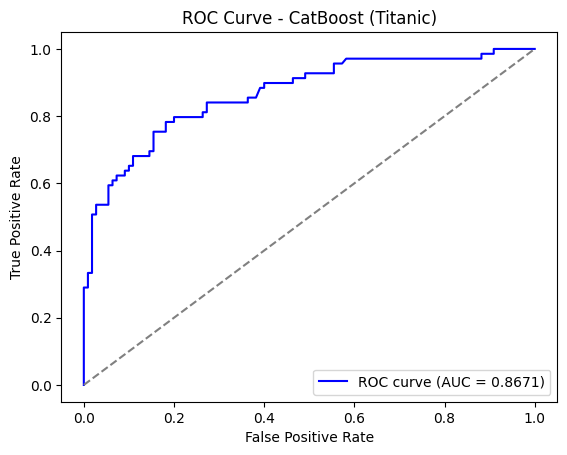

In [ ]:
# Plot ROC curve
fpr, tpr, _ = roc_curve(y_test, probs)
plt.figure()
plt.plot(fpr, tpr, color='blue', label=f'ROC curve (AUC = {roc_auc:.4f})')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve - CatBoost (Titanic)')
plt.legend(loc='lower right')
plt.show()


## Summary and Conclusion

CatBoost combines gradient boosting with innovative techniques like ordered target encoding and ordered boosting to handle categorical features and reduce overfitting. The equations above capture the core mathematical steps, from initializing the model to building trees and making predictions. For practical implementation, you can use the CatBoost library, which automates these steps while allowing customization of parameters like learning rate ($\eta$), tree depth, and number of iterations ($M$). This tutorial provides a comprehensive overview of CatBoost's mathematical foundations and practical implementation in R, showcasing its effectiveness for tasks involving categorical data.


## References

1.  **CatBoost Documentation**

    -   **Link**: [catboost.ai](https://catboost.ai)\
    -   **Description**: Official guide for CatBoost, covering its algorithm, R/Python usage, and tutorials for datasets like Titanic.

2.  **Prokhorenkova et al. (2018). CatBoost: Unbiased Boosting with Categorical Features**

    -   **Link**: [arXiv:1706.09516](https://arxiv.org/abs/1706.09516)\
    -   **Description**: Research paper introducing CatBoost’s ordered boosting and categorical feature handling.

3.  **Kaggle Titanic Dataset**

    -   **Link**: [kaggle.com/c/titanic](https://www.kaggle.com/c/titanic)\
    -   **Description**: Popular dataset with CatBoost tutorials for predicting the "Survived" variable.

4.  [Catboost R Tutorial](https://github.com/catboost/catboost/blob/master/catboost/tutorials/r_tutorial.ipynb)
